# Introduction

This competition is hosted by the third largest insurance company in Brazil: [Porto Seguro](https://en.wikipedia.org/wiki/Porto_Seguro_S.A.) with the task of predicting the *probability that a driver will initiate an insurance claim in the next year.*

This notebook will aim to provide some interactive charts and analysis of the competition data by way of the Python visualisation library Plot.ly and hopefully bring some insights and beautiful plots that others can take and replicate. Plot.ly is one of the main products offered by the software company - [Plotly](https://plot.ly/) which specializes in providing online graphical and statistical visualisations (charts and dashboards) as well as providing an API to a whole rich suite of programming languages and tools such as Python, R, Matlab, Node.js etc.

Listed below for easy convenience are links to the various Plotly plots in this notebook:

* Simple horizontal bar plot - Used to inspect the Target variable distribution
* Correlation Heatmap plot  - Inspect the correlation between the different features
* Scatter plot - Compare the feature importances generated by Random Forest and Gradient-Boosted model
* Vertical bar plot - List in Descending order, the importance of the various features
* 3D Scatter plot 

The themes in this notebook can be briefly summarized follows:

   [**1. Data Quality Checks**](#quality) - Visualising and evaluating all missing/Null values (values that are -1)

**2. Feature inspection and filtering** - Correlation and feature Mutual information plots against the target variable. Inspection of the Binary, categorical and other variables.

**3. Feature importance ranking via learning models** 
/n Building a Random Forest and Gradient Boosted model to help us rank features based off the learning process.

Let's Go

# 概要

この大会は、ブラジルの第3位の保険会社（Porto Seguro）（https://en.wikipedia.org/wiki/Porto_Seguro_S.A）が主催し、次の年に運転者が保険金請求を開始する可能性を予測するタスクです。


このノートブックは、PythonビジュアライゼーションライブラリPlot.lyを使っていくつかの相互作用なチャートとコンペデータの分析を提供し、他の方が考模写できる考察と美しいプロットを目指します。Plot.lyは、ソフトウェア企業が提供する主要製品の1つです。[Plotly]（https://plot.ly/）は、グラフィカルで統計的な視覚化（チャートとダッシュボード）を Python、R、Matlab、Node.jsなどの豊富なプログラミング言語とツールに提供しています。

以下にこのノートブックで使用するさまざまなPlotlyプロットのリンクを記載します。：

* 単純な横棒グラフ - ターゲット変数分布を詳しく調べるのに使用します
* 相関ヒートマッププロット - 異なる特徴間の相関関係を詳しく調べるのに使用します
* 散布図 - ランダムフォレストとグラディエントブーストモデルで生成されたフィーチャの高さを比較する
* 縦棒グラフ - 降順のリスト、さまざまな特徴の重要性
* 3Dスキャッタプロット

In [2]:
# Let us load in the relevant Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py   # プロットライブラリ、オフライン 
py.init_notebook_mode(connected=True) # notebook_mode
import plotly.graph_objs as go
import plotly.tools as tls
import warnings # 警告の制御
from collections import Counter # 各要素の出現個数をカウント
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

Let us load in the training data provided using Pandas:

Pandasを使用して提供されたトレーニングデータを読み込みましょう。

In [3]:
train = pd.read_csv("../input/train.csv")
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
# トレーニングデータセットに含まれる行と列の数を確認する
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


<a id='quality'></a>
## 1. Data Quality checks

**Null or missing values check**

As part of our quality checks, let us quick look at whether there are any null values in the train dataset as follows:

<a id='quality'></a>
## 1.データ品質チェック

**ヌル値または欠損値のチェック**

品質検査の一環として、次のようにトレーニングデータセットにヌル値があるかどうかを素早く見てみましょう。

In [5]:
# any()を2回適用してチェックすると、すべての列でisnullチェックが実行されます。
train.isnull().any().any()

False

* Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as ["Values of -1 indicate that the feature was missing from the observation"](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data). Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.


* ヌル値チェックはFalseを返すが、データが["-1の値は観測から欠落していることを示している]と記述されています(https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data)。したがって、ポルト・セグロは、データのすべてのヌル値を-1の値で置換しただけです。 データの欠損値がどこにあるのか調べてみましょう。

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

ここでは、どの列が値に-1を含んでいるかを見ることができます。たとえば、次のように、すべて-1のヌルを最初に置換することができます。

In [6]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN) # 全コピーをして、-1をNullに置換 

Next, we can use resident Kaggler's [Aleksey Bilogur](https://www.kaggle.com/residentmario) - creator of the  "Missingno" package which is a most useful and convenient tool in visualising missing values in the dataset, so check it out.

次に、Kagglerの[Aleksey Bilogur](https://www.kaggle.com/residentmario)が制作した、データセットの欠損値を視覚化する上で最も有用で便利なツールである、「Missingnoパッケージ」、を使用します。

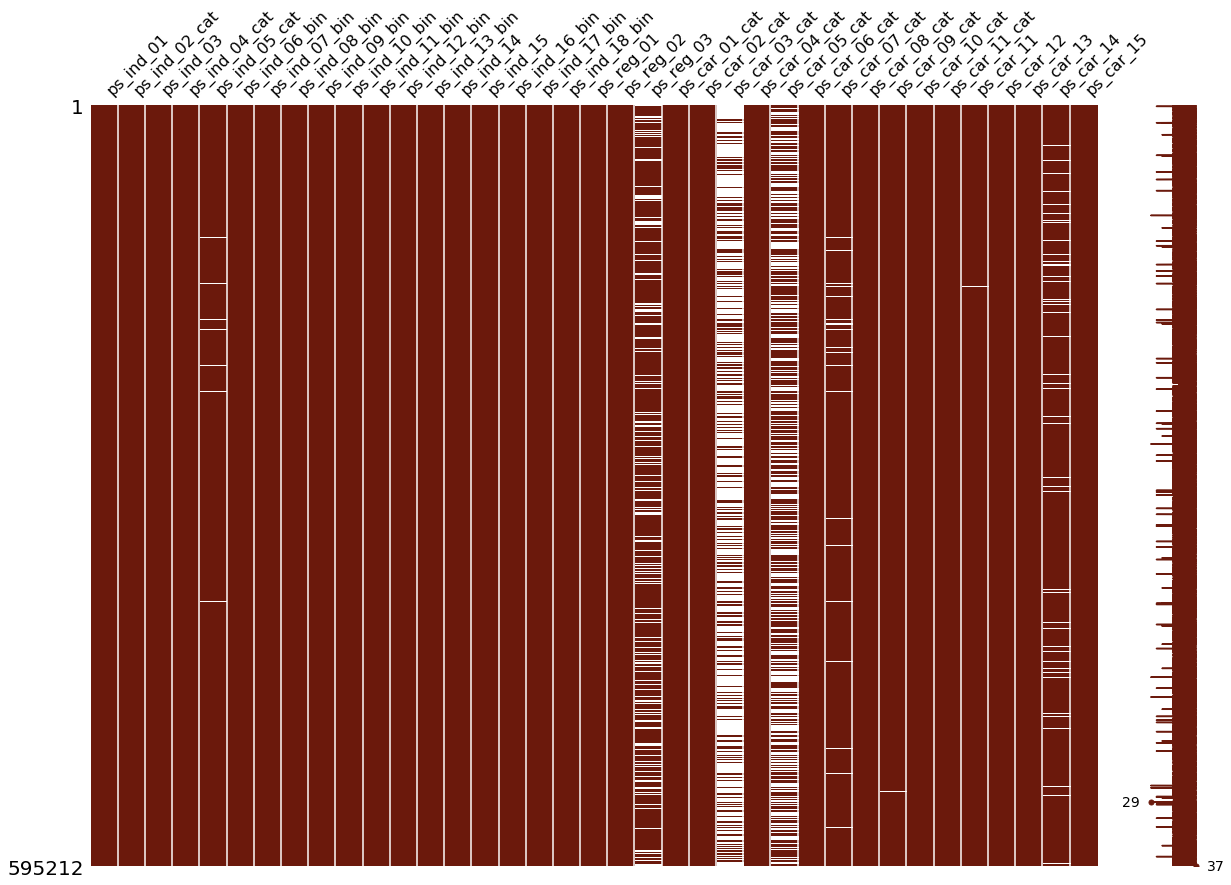

In [7]:
import missingno as msno
# 列ごとのNull値または欠損値
# .iloc[:,2:3]で2～39列を取得
msno.matrix(df=train_copy.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

As we can see, the missing values now become much more apparent and clear when we visualise it, where the empty white bands (data that is missing) superposed on the vertical dark red bands (non-missing data) reflect the nullity of the data in that particular column. In this instance, we can observe that there are 7 features out of the 59 total features (although as rightly pointed out by Justin Nafe in the comments section there are really a grand total of 13 columns with missing values) that actually contained null values. This is due to the fact that the missingno matrix plot can only comfortable fit in approximately 40 odd features to one plot after which some columns may be excluded, and hence the remaining 5 null columns have been excluded. To visualize all nulls, try changing the figsize argument as well as tweaking how we slice the dataframe.

For the 7 null columns that we are able to observe, they are hence listed here as follows:

**ps_ind_05_cat | ps_reg_03 | ps_car_03_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_14**

Most of the missing values occur in the columns suffixed with _cat. One should really take further note of the columns ps_reg_03, ps_car_03_cat and ps_car_05_cat. Evinced from the ratio of white to dark bands, it is very apparent that a big majority of values are missing from these 3 columns, and therefore a blanket replacement of -1 for the nulls might not be a very good strategy.

わかるように、欠損は、視覚化すると明らかになり、空白の白いバンド（欠損データ）は、縦の濃い赤いバンド（重複していないデータ）に重なって各列ごとのデータの無効を反映し表示されます。この例では、59個の特徴のうち7個の特徴(コメント欄にJustin Nafeが正しく指摘さてていますように、実際にはNull値は総計で13列ありました。)があることがわかります。これは、不足しているマトリックス・プロットが約40個の奇数の特徴を1つのプロットに適用した後、一部の列を除外することができ、残りの5つのNULL列は除外されています。すべてのヌルを視覚化するには、データフレームをスライスする方法を調整するだけでなく、figsize引数を変更してみてください。

見ることができる7つのヌル列については、以下のようなリストになります：
**ps_ind_05_cat | ps_reg_03 | ps_car_03_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_14**

欠損値の大部分は、_catで終わる列に現れます。実際にps_reg_03、ps_car_03_cat、ps_car_05_catという列にさらに注意する必要があります。白から暗のバンドの比率から明らかなように、これらの3つの列から値の大多数が欠落していることは非常に明白であり、したがって、ヌルの-1置換は非常に良い戦略ではないかもしれません。

**Target variable inspection**

Another standard check normally conducted on the data is with regards to our target variable, where in this case, the column is conveniently titled "target". The target value also comes by the moniker of class/label/correct answer and is used in supervised learning models along with the corresponding data that is given (in our case all our train data except the id column) to learn the function that best maps the data to our target in the hope that this learned function can generalize and predict well with new unseen data.

**ターゲット変数の検査**

データ上で通常行われるもう1つの標準的なチェックは、この場合、列が便宜的に「ターゲット」と題されたターゲット変数に関するものです。目標値は、クラス/ラベル/正解のモニカによっても与えられ、教師あり学習モデルで与えられたデータ（この例ではid列以外のすべての学習データ）とともに使用され、学習された関数は一般化され、新しい目に見えないデータを予測することができます。

In [8]:
# ploty による棒グラフ
data = [go.Bar(
            x = train["target"].value_counts().index.values,
            y = train["target"].value_counts().values,
            text='Distribution of target variable' # 目標変数の分布
    )]

layout = go.Layout(
    title='Target variable distribution' # 目標変数の分布
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

Hmmn, the target variable is rather imbalanced so it might be something to keep in mind. An imbalanced target will prove quite

うーん、目標変数はむしろ不均衡なので、心に留めておくべきことかもしれません。 不均衡な目標は、

**Datatype check**

This check is carried out to see what kind of datatypes the train set is comprised of : integers or characters or floats just to gain a better overview of the data we were provided with. One trick to obtain counts of the unique types in a python sequence is to use the Counter method, when you import the **Collections** module as follows:

**データ型チェック**


このチェックは、学習セットがどのような種類のデータ型で構成されているかを確認するために実行されます。文字列または浮動小数点数は、提供されたデータのより良い考察を得るためにのみ使用されます。 Pythonシーケンスで一意の型の数を取得する1つの方法は、**Collections** モジュールを次のようにインポートするときにCounterメソッドを使用することです。文字列または浮動小数点数は、提供されたデータのより良い概要を得るためにのみ使用されます。

In [9]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

As alluded to above, there are a total of 59 columns that make up the train dataset and as we can observe from this check, the features/columns consist of only two datatypes - Integer and floats. 

Another point to note is that Porto Seguro has actually provided us data with headers that come suffixed with abbreviations such as "_bin", "_cat" and "_reg", where they have given us a rough explanation that _bin indicates binary features while _cat indicates categorical features whilst the rest are either continuous or ordinal features. Here I shall simplify this a bit further just by looking at float values (probably only the continuous features) and integer datatypes (binary, categorical and ordinal features).

上記のように学習データセットを構成する列の合計が59あり、このチェックからわかるように、特徴/列は整数と浮動小数点の2つのデータ型のみで構成されています。

注意すべきもう一つのポイントはPorto Seguroは、実際には、 "_bin"、 "_cat"、 "_reg"などの略語が付いたヘッダーをデータとして提供しています。_binはバイナリフィーチャを示し、_catはカテゴリ特徴を示し、残りは連続特徴または順序特徴のいずれかであるという大まかな説明を与えています。ここでは、浮動小数点数（おそらく、連続している特徴値のみ）と整数データ型（バイナリ、カテゴリ、および序数フィーチャ）を見るだけでこれをさらに単純化します。

In [10]:
# pandas.DataFrame.select_dtypes 特定の型の列を抽出
# 浮動小数点型
train_float = train.select_dtypes(include=['float64'])
# 整数型
train_int = train.select_dtypes(include=['int64'])

## Correlation plots

As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

**Correlation of float features**

##相関プロット

まず、フィーチャが次のフィーチャとどのように線形関係にあるかを素早く見て、ここからいくつかの洞察を得ることを開始するために、線形相関プロットを生成してみましょう。 ここでは、seabornの統計的視覚化パッケージを使用して、相関値のヒートマップをプロットします。便利なことに、Pandasのデータフレームには、Pearson相関を計算するcorr（）メソッドが組み込まれています。また、Seabornの相関プロットの呼び出し方法も便利です。 ちょうど文字通り言葉 "ヒートマップ"

**浮動小数点機能の相関**

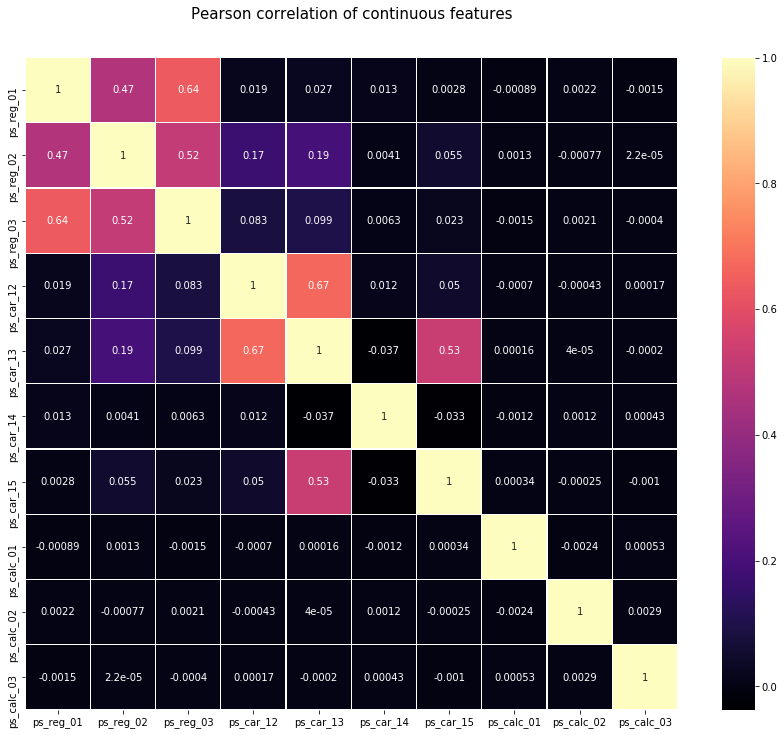

In [11]:
# 連続特徴のピアソン相関 
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

**(ps_reg_01, ps_reg_03)**

**(ps_reg_02, ps_reg_03)**

**(ps_car_12, ps_car_13)**

**(ps_car_13, ps_car_15)**

相関プロットから、大部分の特徴は互いにゼロまたは非相関を表示することがわかります。これはさらなる調査を後に証明することになる、非常に興味深い結果です。 現時点では、正の線形相関を示す対の特徴が次のようにリストされています。

**(ps_reg_01, ps_reg_03)**

**(ps_reg_02, ps_reg_03)**

**(ps_car_12, ps_car_13)**

**(ps_car_13, ps_car_15)**

**Correlation of integer features**

For the columns of interger datatype, I shall now switch to using the Plotly library to show how one can also generate a heatmap of correlation values interactively. Much like our earlier Plotly plot, we generate a heatmap object by simply invoking the "go.Heatmap". Here we have to provide values to three different axes, where x and y axes take in the column names while the correlation value is provided by the z-axis. The colorscale attribute takes in keywords that correspond to different color palettes that you will see in the heatmap where in this example, I have used the Greys colorscale (others include Portland and Viridis - try it for yourself). 

**整数特徴の相関**

intergerデータ型の列については、Plotlyライブラリを使用して、相関値のヒートマップを相互作用に生成する方法を示します。 以前のPlotlyプロットと同様に、単に "go.Heatmap"を呼び出すことでヒートマップオブジェクトを生成します。ここでは、3つの異なる軸に値を入力する必要があります。ここで、x軸とy軸は列名を取り込み、相関値はz軸で与えられます。colorscale属性は、ヒートマップに表示されるさまざまなカラーパレットに対応するキーワードを取ります。この例では、私はGraysのカラースケールを使用しています（他のものにはPortlandとViridisが含まれます）。

In [12]:
#train_int = train_int.drop(["id", "target"], axis=1)
# colormap = plt.cm.bone
# plt.figure(figsize=(21,16))
# plt.title('Pearson correlation of categorical features', y=1.05, size=15)
# sns.heatmap(train_cat.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
data = [
    go.Heatmap(
        z= train_int.corr().values,
        x=train_int.columns.values,
        y=train_int.columns.values,
        colorscale='Viridis',
        reversescale = False)#,
        #text = True ,
        #opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

Similarly, we can observe that there are a huge number of columns that are not linearly correlated with each other at all, evident from the fact that we observe quite a lot of 0 value cells in our correlation plot. This is quite a useful observation to us, especially if we are trying to perform dimensionality reduction transformations such as Principal Component Analysis (PCA), this would require a certain degree of correlation  . We can note some features of interest are as follows:

***Negatively correlated features*** : ps_ind_06_bin, ps_ind_07_bin,  ps_ind_08_bin,  ps_ind_09_bin

One interesting aspect to note is that in our earlier analysis on nullity, ps_car_03_cat and ps_car_05_cat were found to contain many missing or null values. Therefore it should come as no surprise that both these features show quite a strong positive linear correlation to each other on this basis, albeit one that may not really reflect the underlying truth for the data.

同様に、相関プロットでは0の値のセルが非常に多く観測されていることから、直線的に相関しない膨大な数の列が存在することがわかります。特に、主成分分析（PCA）などの次元削減変換を実行しようとしている場合は、ある程度の相関が必要です。興味のある特徴は次のとおりです。

***負の相関特徴***：ps_ind_06_bin、ps_ind_07_bin、ps_ind_08_bin、ps_ind_09_bin

興味深いことに、注目すべき点は、私たちの以前の欠損値の分析では、ps_car_03_catとps_car_05_catには、欠損値またはヌル値が多く含まれていました。したがって、これらの両方の特徴が、データの根底にある真理を実際に反映していないかもしれないにもかかわらず、この基準で互いに強い正の線形相関を示すことは驚くべきことではありません。

## Mutual Information plots

Mutual information is another useful tool as it allows one to inspect the mutual information between the target variable and the corresponding feature it is calculated against. For classification problems, we can conveniently call Sklearn's mutual_info_classif method which measures the dependency between two random variables and ranges from zero (where the random variables are independent of each other) to higher values (indicate some dependency). This therefore will help give us an idea of how much information from the target may be contained within the features.

The sklearn implementation of the mutual_info_classif function tells us that it "relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances", where you can go into more detail on the official sklearn page in the [link here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif).

## 相互情報プロット

相互情報は、ターゲット変数と対応する特徴との間の相互情報を計算し、検査することを可能にするもう1つの有用なツールである。分類問題では、Sklearnのmutual_info_classifメソッドを呼び出すことで、2つの確率変数間の依存関係を測定し、ゼロ（ランダム変数が互いに独立している）からより高い値（依存関係を示す）までの範囲で簡単に呼び出すことができます。これは、ターゲットからのどのくらいの情報が特徴内に含まれるのかを私たちに知らせるのに役立ちます。

mutual_info_classif関数のsklearnの実装では、k近傍法からのエントロピー推定に基づくノンパラメトリックな手法に依存していることがわかります。ここでは、[link here]の公式sklearnページを詳しく見ることができます。(http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif).

※1 ノンパラメトリック：母集団の分布型（母数）について一切の仮定を設けない。 このため，分布によらない手法 と呼ばれることもある。 特に，標本サイズが小さい場合には，それから求められた統計量の分布型は不正確なことが多く，パラメトリックな手法を適用することは不適切になりやすい。 しかし，ノンパラメトリックな手法は常に適用可能である。 
※2 k近傍法：クラス判別用の手法。学習データをベクトル空間上にプロットしておき、未知のデータが得られたら、そこから距離が近い順に任意のK個を取得し、多数決でデータが属するクラスを推定する。
※3 エントロピー（英: entropy）は、情報理論の概念で、あるできごと（事象）が起きた際、それがどれほど起こりにくいかを表す尺度である。ありふれたできごと（たとえば「風の音」）が起こったことを知ってもそれはたいした「情報」にはならないが、逆に珍しいできごと（たとえば「曲の演奏」）が起これば、それはより多くの「情報」を含んでいると考えられる。情報量はそのできごとが本質的にどの程度の情報を持つかの尺度であるとみなすこともできる。なおここでいう「情報」とは、あくまでそのできごとの起こりにくさ（確率）だけによって決まる数学的な量でしかなく、個人・社会における有用性とは無関係である。たとえば「自分が宝くじに当たった」と「見知らぬAさんが宝くじに当たった」は、前者の方が有用な情報に見えるが、両者の情報量は全く同じである（宝くじが当たる確率は所与条件一定のもとでは誰でも同じであるため）。


In [13]:
# mutual_info_classif:相互情報量を求める関数
mf = mutual_info_classif(train_float.values,train.target.values,n_neighbors=3, random_state=17 )
print(mf)

[0.01402035 0.00431986 0.0055185  0.00778454 0.00157233 0.00197537
 0.01226    0.00553038 0.00545101 0.00562139]


## Binary features inspection

Another aspect of the data that we may want to inspect would be the columns that only contain binary values, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly barplot of these binary values as follows:

## バイナリ特徴検査

検査したいデータの別の側面は、バイナリ値のみを含む列です。つまり、値は2つの値1または0のどちらか一方のみを取ります。次のように、これらのバイナリ値を含むすべての列を格納し、これらのバイナリ値の垂直プロットバープロットを生成します。

In [14]:
# trainから「_bin」を含む列を抽出
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum()) # 0の値の頻出度
    one_list.append((train[col]==1).sum()) # 1の値の頻出度

In [15]:
# 0の頻出度
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
# 1の頻出度
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

Here we observe that there are 4 features : ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. This begs the question of whether these features are useful at all as they do not contain much information about the other class vis-a-vis the target.

ここでは、ps_ind_10_bin、ps_ind_11_bin、ps_ind_12_bin、ps_ind_13_binの4つの特徴が存在することがわかります。ps_ind_10_binは完全にゼロによって支配されています。これは、ターゲットに対する他のクラスに関する多くの情報を含んでいないので、これらの特徴が有用であるかどうかという問題があります。

## Categorical and Ordinal feature inspection

Let us first take a look at the features that are termed categorical as per their suffix "_cat". 

## 類別的および順序的な特徴検査

最初に、接尾辞 "_cat"のようにカテゴリに分類される特徴を見てみましょう。

## Feature importance via Random Forest

Let us now implement a Random Forest model where we fit the training data with a Random Forest Classifier and look at the ranking of the features after the model has finished training. This is a quick way of using an ensemble model (ensemble of weak decision tree learners applied under Bootstrap aggregated) which does not require much parameter tuning in obtaining useful feature importances and is also pretty robust to target imbalances. We call the Random Forest as follows:


## ランダムフォレストによる機能の重要性

ここではランダムフォレストモデルを実装し、ランダムフォレストクラシファイアとトレーニングデータを適合させ、モデルがトレーニングを終えた後の特徴のランキングを見てみましょう。これは、有用な特徴量を得るために多くのパラメータ調整を必要とせず、ターゲットの不均衡に対してかなり堅牢なアンサンブルモデル(アンサンブルの弱意思決定木学習者のブートストラップに使用され)を使用する簡単な方法です。私たちはランダムフォレストを以下のように呼んでいます：

In [16]:
from sklearn.ensemble import RandomForestClassifier # ランダムフォレストをインポート
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(train.drop(['id', 'target'],axis=1), train.target)
features = train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


**Plot.ly Scatter Plot of feature importances**

Having trained the Random Forest, we can obtain the list of feature importances by invoking the attribute "feature_importances_" and plot our next Plotly plot, the Scatter plot.

Here we invoke the command Scatter and as per the previous Plotly plots, we have to define our y and x-axes. However the one thing that we pay attention to in scatter plots is the marker attribute. It is the marker attribute where we define and hence control the size, color and scale of the scatter points embedded.

**Plot.ly散布図の機能のインポート**

ランダムフォレストを訓練した後、属性「feature_importances_」を呼び出して次のPlotlyから散布図をプロットすることで、特徴の重要度のリストを得ることができます。

ここでは、Scatterコマンドを呼び出し、前のPlotlyプロットとして、y軸とx軸を定義する必要があります。散布図で注意を払うのは、マーカー属性です。埋め込まれたプロットのサイズ、色およびスケールを制御することができる。

In [17]:
# 散布図 
trace = go.Scatter(
    y = rf.feature_importances_, # ランダムフォレストの特徴量の重要度
    x = features, # id,target
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

Furthermore we could also display a sorted list of all the features ranked by order of their importance, from highest to lowest via the same plotly barplots as follows:

さらに、重要度の高い順にランク付けされたすべての特徴のソートされたリストを、次のような同じプロットの棒グラフを使用して最高から最低まで表示することもできます。

In [18]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

**Decision Tree visualisation**

One other interesting trick or technique oft used would be to visualize the tree branches or decisions made by the model. For simplicity, I fit a decision tree (of max_depth = 3) and hence you only see 3 levels in the decision branch, use the export to graph visualization attribute in sklearn "export_graphviz" and then export and import the tree image for visualization in this notebook.

**意思決定ツリーの可視化**

他の興味深いトリックやテクニックの1つは、モデルによって作られた木の枝や意思決定を視覚化することです。  簡単にするために、私は意思決定ツリー（max_depth = 3）に合致しているので、決定ブランチでは3つのレベルしか表示されず、sklearn export_graphvizでグラフ化属性をグラフにエクスポートしてから、このノートブックで視覚化のためにツリーイメージをエクスポートおよびインポートします 。

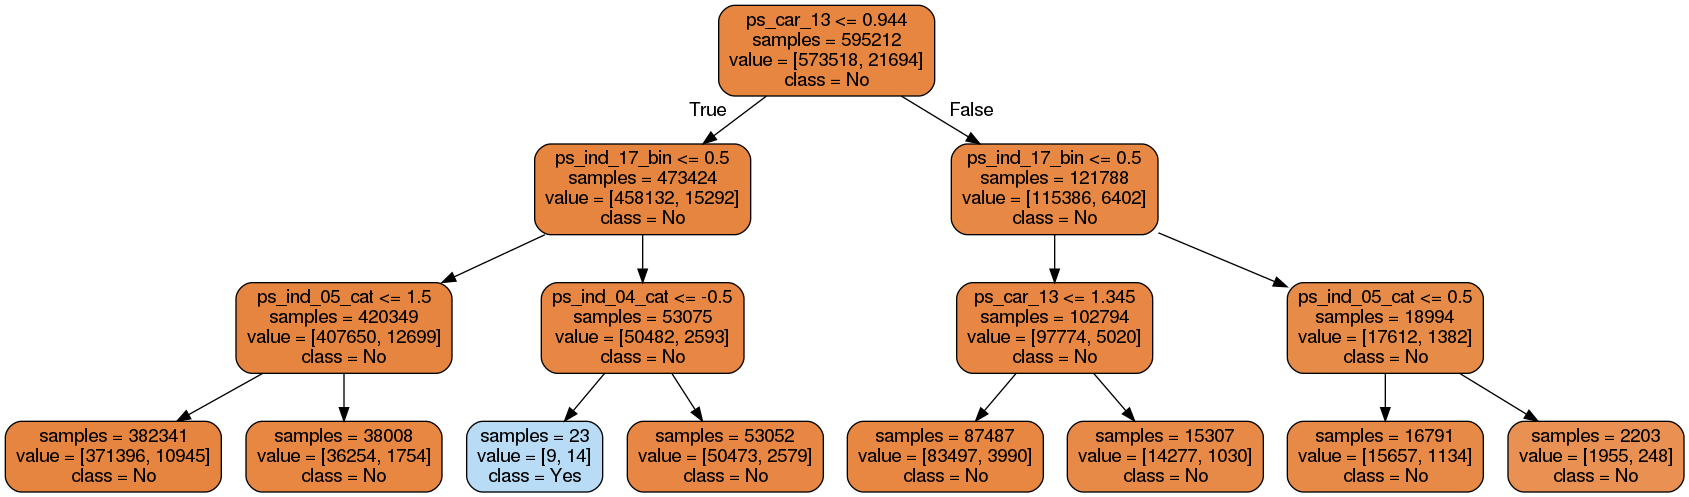

In [20]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(train.drop(['id', 'target'],axis=1), train.target)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = train.drop(['id', 'target'],axis=1).columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
# .dotを.pngに変換してWebノートブックに表示できるようにする
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png",)

## Feature importance via Gradient Boosting model

Just for curiosity, let us try another learning method in getting our feature importances. This time, we use a Gradient Boosting classifier to fit to the training data . Gradient Boosting proceeds in a forward stage-wise fashion, where at each stage regression tress are fitted on the gradient of the loss function (which defaults to the deviance in Sklearn implementation). 

## Gradient Boostingモデルによる機能の重要性

好奇心のために、他の特徴を得るために別の学習方法を試してみましょう。今回は、Gradient Boosting分類を使用してトレーニングデータに合わせます。今回は、Gradient Boosting分類を使用してトレーニングデータに合わせます。Gradient Boostingは、各ステージで回帰タッセルが損失関数の勾配Sklearnの実装ではデフォルト値である）に当てはめられた順ステージ方式で進行する。

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_leaf=4, max_features=0.2, random_state=0)
gb.fit(train.drop(['id', 'target'],axis=1), train.target)
features = train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


In [22]:
# 散布図
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [23]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Gradient Boosting Classifer Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

Interestingly we observe that in both Random forest and Gradient Boosted learning models, the most important feature that both models picked out was the column : **ps_car_13**. 

This particular feature warrants further investigation so let us conduct a deep-dive into it.


興味深いことに、ランダムフォレストとグラジエントブースト学習モデルの両方で、両モデルが選んだ最も重要な機能は、列：** ps_car_13 **です。

この特定の特徴は詳細な調査を必要とするため、深く掘り下げて検討してください。

# Conclusion

We have performed quite an extensive inspection of the Porto Seguro dataset by inspecting for null values and data quality, investigated linear correlations between features, inspected some of the feature distributions  as well as implemented a couple of learning models (Random forest and Gradient Boosting classifier) so as to identify features that the models deemed important. 

# 結論

我々は、ヌル値とデータ品質を検査し、特徴間の線形相関を調べ、特徴分布のいくつかを検査し、いくつかの学習モデル（ランダムフォレストとグラジエントブースト分類器）を実装して、Porto Seguroデータセットのかなりの検査を行った。 モデルが重要であると考える特徴を識別することができる。